In [1]:
!hostname

amueller-tabpfn-4gpu


In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [3]:
import pandas as pd
previous_results = pd.read_csv("log/big_epoch77.csv", index_col=0)
previous_results

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn,mlp_shallow,mlp_big,distilled_tabpfn_shallow,...,tabpfn_mine_32,distilled_tabpfn_parameters_tuned_upsample_wrong_fit,distilled_tabpfn_parameters_tuned_upsample_per_batch,forward_linear,forward_mlp,forward_mlp_new,forward_mlp_new_label_permutation,forward_mlp_model_big_bugfix_caching,forward_mlp_model_big_bugfix_caching_permutations,big_epoch_77
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461,0.710050,0.669491,0.712884,...,0.718314,0.669577,0.712704,0.696557,0.651133,0.681793,0.690603,0.688895,0.688020,0.696291
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787,0.891158,0.861414,0.882956,...,0.899814,0.864014,0.882314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dermatology,0.998480,NaN,NaN,0.998870,0.996039,0.999330,NaN,0.998577,0.998232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794,0.936975,0.906486,0.937920,...,0.955668,0.930003,0.940401,0.864910,0.855627,0.862570,0.869392,0.866997,0.869279,0.868732
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821,0.879479,0.875131,0.847782,...,0.940563,0.911967,0.926118,0.856450,0.846307,0.811603,0.880368,0.846599,0.859279,0.853173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367,0.933262,0.953997,0.931992,...,0.930469,0.924069,0.928346,0.873067,0.785393,0.898043,0.896978,0.886537,0.897711,0.917566
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000,0.991000,0.995000,0.991000,...,0.997000,0.996333,0.996333,0.997000,0.998000,0.996000,0.998000,0.998000,0.997333,0.998000
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497,0.948442,0.972864,0.948922,...,0.990548,0.980152,0.981755,0.915866,0.792470,0.856818,0.937941,0.918776,0.940685,0.925167
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797,1.000000,0.999333,0.999841,...,0.999797,0.999797,0.999797,0.999921,0.999514,0.999797,0.999841,0.999841,0.999841,0.999587


In [4]:
from tabpfn.scripts.evaluate_baselines_sklearn import evaluate

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from tabpfn.transformer_make_model import ForwardMLPModel, PermutationMeta
import numpy as np

def add_forward_mlp_model(model_name, model_path, current_models=None, permutations=False):
    def make_forward_mlp_model(categorical_features):
        cont_pipe = make_pipeline(StandardScaler(), SimpleImputer())
        preprocess = make_column_transformer((OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features), remainder=cont_pipe)
        if permutations:
            return make_pipeline(preprocess, PermutationMeta(ForwardMLPModel(path=model_path)))
        else:
            return make_pipeline(preprocess, ForwardMLPModel(path=model_path))
    
    if current_models:
        current_models[model_name] = make_forward_mlp_model
        return current_models
    return {model_name: make_forward_mlp_model}


In [6]:
models = add_forward_mlp_model("big_epoch_77_permutations", "models_diff/prior_diff_real_checkpoint_predict_mlp_attention_nlayer12_lr0001_multiclass_04_18_2023_21_31_58_n_0_epoch_77.cpkt", permutations=True)

In [ ]:
new_results = evaluate(previous_results, models)

Number of datasets: 149


  0%|                                                                                                                                                                                                                                                 | 0/149 [00:00<?, ?it/s]

predicted hidden layer size  None
decoder output layer size  267786


  2%|████▋                                                                                                                                                                                                                                    | 3/149 [00:05<03:25,  1.41s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/transformer_make_model.py", line 432, in fit
    self.vc_.fit(X, y)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/ensemble/_voting.py", line 346, in fit
    return super().fit(X, transformed_y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 17%|████████████████████████████████████████▍                                                                                                                                                                                               | 26/149 [00:40<03:18,  1.62s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/transformer_make_model.py", line 432, in fit
    self.vc_.fit(X, y)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/ensemble/_voting.py", line 346, in fit
    return super().fit(X, transformed_y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 26%|████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 39/149 [01:05<03:48,  2.08s/it]

In [13]:
new_results.to_csv("log/big_epoch77_bak.csv")

In [15]:
new_results.isna().sum()

mlp                                                     0
distilled_tabpfn                                        8
distilled_tabpfn_ht                                     8
logreg                                                  0
knn                                                     0
rf                                                      0
tabpfn                                                  8
mlp_shallow                                             0
mlp_big                                                 0
distilled_tabpfn_shallow                                8
distilled_tabpfn_big                                    8
distilled_tabpfn_big_dropout                            8
distilled_tabpfn_big_long                               8
distilled_tabpfn_big_long_dropout                       8
distilled_tabpfn_big_layernorm                          8
distilled_tabpfn_parameters_tuned                       8
distilled_tabpfn_parameters_tuned_upsample              3
tabpfn_32     

In [29]:
subset = ['mlp', 'tabpfn_distilled_tuned_mine','logreg', 'knn', 'rf', 'tabpfn', 'tabpfn_mine', 'big_epoch_77',  'forward_mlp_model_big_bugfix_caching_permutations', 'forward_mlp_model_big_bugfix_caching' ]
bla  = new_results.dropna()[subset].stack().reset_index()
bla.columns = ['dataset_name', 'classifier_name', 'accuracy']
bla

,dataset_name,classifier_name,accuracy
0,breast-cancer,mlp,0.705165
1,breast-cancer,tabpfn_distilled_tuned_mine,0.727260
2,breast-cancer,logreg,0.694928
3,breast-cancer,knn,0.637934
4,breast-cancer,rf,0.683816
...,...,...,...
1365,penguins,tabpfn,0.999797
1366,penguins,tabpfn_mine,0.999797
1367,penguins,big_epoch_77,0.999587
1368,penguins,forward_mlp_model_big_bugfix_caching_permutations,0.999841


['mlp' 'tabpfn_distilled_tuned_mine' 'logreg' 'knn' 'rf' 'tabpfn'
 'tabpfn_mine' 'big_epoch_77'
 'forward_mlp_model_big_bugfix_caching_permutations'
 'forward_mlp_model_big_bugfix_caching']
big_epoch_77                                          4.0
forward_mlp_model_big_bugfix_caching                  2.0
forward_mlp_model_big_bugfix_caching_permutations     4.0
knn                                                   2.0
logreg                                               12.0
mlp                                                  12.0
rf                                                   20.0
tabpfn                                               15.0
tabpfn_distilled_tuned_mine                          12.0
tabpfn_mine                                          32.0
dtype: float64
knn                                                  8.142336
forward_mlp_model_big_bugfix_caching                 6.463504
mlp                                                  6.069343
forward_mlp_model_big_bugfix_

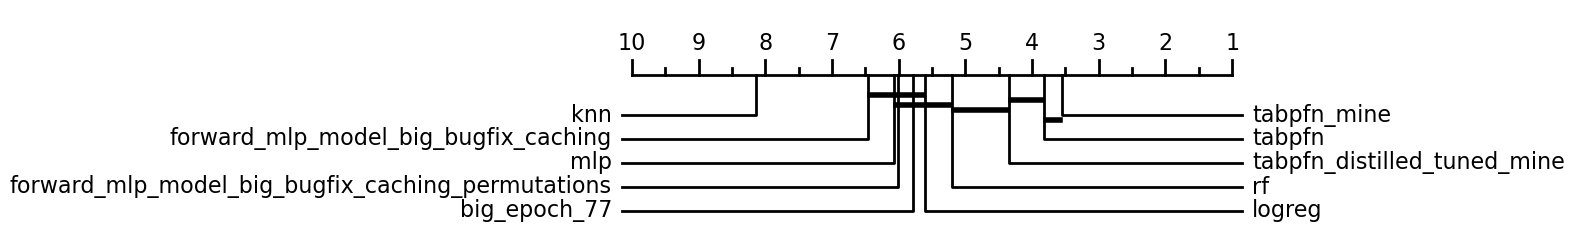

In [30]:
from tabpfn.scripts.critical_differences import draw_cd_diagram
res = draw_cd_diagram(bla, title="OVO ROC AUC")

In [52]:
import pandas as pd
results = pd.read_csv("sklearn_implementation_forward_mlp_model_big_bugfix_caching.csv", index_col=0)

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier




In [142]:
results

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn,mlp_shallow,mlp_big,distilled_tabpfn_shallow,...,distilled_tabpfn_parameters_tuned,distilled_tabpfn_parameters_tuned_upsample,tabpfn_32,tabpfn_mine,tabpfn_mine_32,tabpfn_distilled_tuned_mine,distilled_tabpfn_parameters_tuned_upsample_wrong_fit,distilled_tabpfn_parameters_tuned_upsample_per_batch,forward_linear,forward_mlp
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461,0.710050,0.669491,0.712884,...,0.727260,0.723659,0.723902,0.720337,0.718314,0.727260,0.669577,0.712704,0.696557,0.651133
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787,0.891158,0.861414,0.882956,...,0.879458,0.880952,0.896212,0.897720,0.899814,0.879458,0.864014,0.882314,NaN,NaN
dermatology,0.998480,NaN,NaN,0.998870,0.996039,0.999330,NaN,0.998577,0.998232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794,0.936975,0.906486,0.937920,...,0.921612,0.923021,0.943153,0.957985,0.955668,0.921612,0.930003,0.940401,0.864910,0.855627
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821,0.879479,0.875131,0.847782,...,0.936122,0.931284,0.941514,0.936975,0.940563,0.936122,0.911967,0.926118,0.856450,0.846307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367,0.933262,0.953997,0.931992,...,0.937027,0.926744,0.927580,0.936719,0.930469,0.937027,0.924069,0.928346,0.873067,0.785393
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000,0.991000,0.995000,0.991000,...,0.995667,0.996000,0.997000,0.997000,0.997000,0.995667,0.996333,0.996333,0.997000,0.998000
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497,0.948442,0.972864,0.948922,...,0.985752,0.984074,0.990170,0.988677,0.990548,0.985752,0.980152,0.981755,0.915866,0.792470
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797,1.000000,0.999333,0.999841,...,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999921,0.999514


['mlp' 'distilled_tabpfn' 'logreg' 'knn' 'rf' 'tabpfn'
 'distilled_tabpfn_parameters_tuned' 'tabpfn_32' 'tabpfn_mine'
 'tabpfn_mine_32' 'forward_linear' 'forward_mlp' 'forward_mlp_new'
 'forward_mlp_new_label_permutation'
 'forward_mlp_model_big_bugfix_caching'
 'forward_mlp_model_big_bugfix_caching_permutations']
distilled_tabpfn                                      9.0
distilled_tabpfn_parameters_tuned                     8.0
forward_linear                                        6.0
forward_mlp                                           4.0
forward_mlp_model_big_bugfix_caching                  0.0
forward_mlp_model_big_bugfix_caching_permutations     2.0
forward_mlp_new                                       3.0
forward_mlp_new_label_permutation                     3.0
knn                                                   2.0
logreg                                                9.0
mlp                                                   9.0
rf                                            

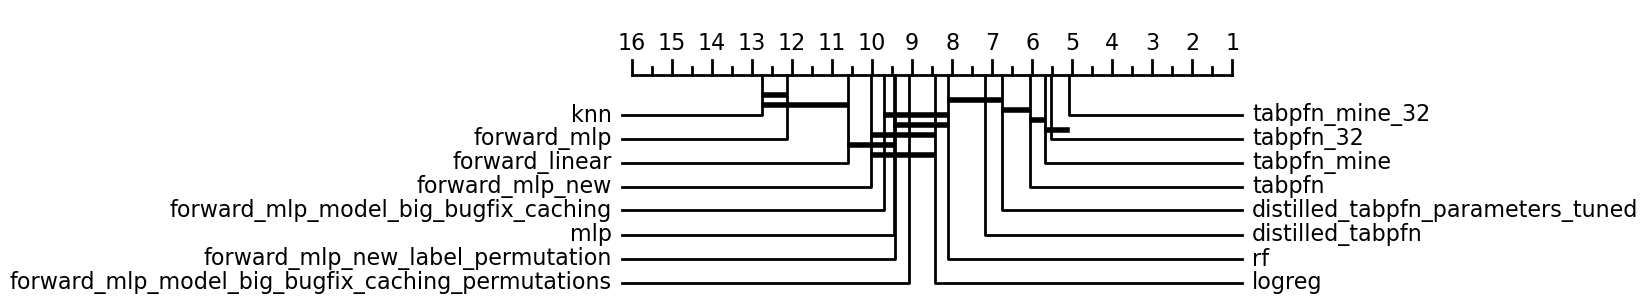

In [92]:
from tabpfn.scripts.critical_differences import draw_cd_diagram

res = draw_cd_diagram(bla, title="OVO ROC AUC")

In [127]:
results.model.replace({'distilled_tabpfn_parameters_tuned': 'distilled tabpfn', 'distilled_tabpfn_quick': 'distilled tabpfn (short training)', 'tabpfn_mine': 'tabpfn (3 permutations)', 'tabpfn_mine_32': 'tabpfn (32 permutations)'}, inplace=True)